Philippe Joly 2025-05-26

# Axion Signal Expectation

This notebook is to characterize the expected signal from an axion-like particle (ALP) or a dark photon (DP) coming from the earth's ionosphere. The calculations are based on [Beadle C. *et al.*, 2024](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.133.251001)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [2]:
# Natural units
# hbar = c = 1
# remaining unit chosen to be eV
ev=1.602e-19 # eV->J

h=6.626e-34 # Planck J s
hbar_eV = h/(2*np.pi)/ev # Reduced Planck in eV s
c=2.998e8 # Speed of Light m/s
k_b = 1.380649e-23 # Boltzmann constant in m2 kg s-2 K-1

eV_to_Hz = 1.519e15 # Taken from natural units chart
natural_to_ms = 2.998e8 # Speed conversion (No dimensions since c=1 in natural units)
eV2_to_W = 0.2434e-3 # eV^2 to W conversion
eV_1_to_m = 1.973e-7 # eV^-1 to m conversion

vc = 220e3 # Circular velocity of Milky Way
sigma= np.sqrt(3/2)*vc
v2 = 3*sigma**2 # Mean square velocity 

## Frequency Peak and Width 

In [3]:
def peak_freq(m):
   """
   Calculatesthe expected frequency peak and FWHM in Hz for a given DM particle of a given mass.
   
   Parameters:
   m (float): mass of the DM particle in eV
   
   Returns:
   (float, float) : peak frequency and the frequency distribution's FWHM
   """
   return (
        m*(1+v2/natural_to_ms**2/6)*eV_to_Hz/(2*np.pi), 
        m*v2/natural_to_ms**2*eV_to_Hz/(2*np.pi)
    )

m0 = 5e-9
m_step = 5e-9

for i in range(10):
    f_peak, fwhm = peak_freq(m0+m_step*i)
    print("------------")
    print("m =", m0+m_step*i, "eV")
    print("Peak Frequency:", f_peak*1e-6, "MHz")
    print("FWHM:", fwhm, "Hz")

------------
m = 5e-09 eV
Peak Frequency: 1.2087822809756414 MHz
FWHM: 2.929156178258547 Hz
------------
m = 1e-08 eV
Peak Frequency: 2.417564561951283 MHz
FWHM: 5.858312356517094 Hz
------------
m = 1.5000000000000002e-08 eV
Peak Frequency: 3.626346842926925 MHz
FWHM: 8.787468534775643 Hz
------------
m = 2e-08 eV
Peak Frequency: 4.835129123902566 MHz
FWHM: 11.716624713034188 Hz
------------
m = 2.5e-08 eV
Peak Frequency: 6.043911404878208 MHz
FWHM: 14.645780891292732 Hz
------------
m = 3e-08 eV
Peak Frequency: 7.252693685853849 MHz
FWHM: 17.574937069551282 Hz
------------
m = 3.5e-08 eV
Peak Frequency: 8.461475966829493 MHz
FWHM: 20.504093247809827 Hz
------------
m = 4e-08 eV
Peak Frequency: 9.670258247805132 MHz
FWHM: 23.433249426068375 Hz
------------
m = 4.5e-08 eV
Peak Frequency: 10.879040528780775 MHz
FWHM: 26.362405604326923 Hz
------------
m = 5e-08 eV
Peak Frequency: 12.087822809756416 MHz
FWHM: 29.291561782585465 Hz


## Frequency Distribution 

In [4]:
def alp_g_eff(m, g_yy=1e-21, B=0.002):
    """
    Calculate the effective coupling constant for ALPs.
    
    Parameters:
    m (float): mass of the ALP in eV
    g_yy (float): Coupling Strength in
    eV^-1 (~1e-12 GeV^-1)
    B (float): magnetic field in eV^2 (~0.002 eV^2)
    
    Returns:
    float: effective coupling constant
    """
    return B*g_yy/m

m0 = 2e-8
m_step = 5e-9

for i in range(4):
    g_eff = alp_g_eff(m0+m_step*i)
    print("------------")
    print("m =", m0+m_step*i, "eV")
    print("g_eff:", g_eff)

------------
m = 2e-08 eV
g_eff: 9.999999999999999e-17
------------
m = 2.5e-08 eV
g_eff: 7.999999999999999e-17
------------
m = 3.0000000000000004e-08 eV
g_eff: 6.666666666666666e-17
------------
m = 3.5e-08 eV
g_eff: 5.714285714285713e-17


In [5]:
def EM_energy_density(m, g_eff):
    """
    Calculate the energy density of the electromagnetic field.
    This function is from Beadle 2024 (CERN) and holds within 10% for 1e-9 eV < m < 3e-8 eV
    For a more precise approximation, numerical methods can be used.
    
    Parameters:
    m (float): mass of the ALP in eV
    g_eff (float): effective coupling constant
    
    Returns:
    float: energy density in eV^4
    """
    return 3e-23*(g_eff*1e10)/(1+np.exp(3.8-m/2.3e-9))

dp_g_eff = 4e-13

m0 = 2e-8
m_step = 5e-9

for i in range(4):
    print("------------")
    print("m =", m0+m_step*i, "eV")
    print("DP rho_EM:", EM_energy_density(m0+m_step*i, dp_g_eff), "eV^4")
    print("ALP rho_EM:", EM_energy_density(m0+m_step*i, alp_g_eff(m0+m_step*i)), "eV^4")

------------
m = 2e-08 eV
DP rho_EM: 1.1910917887733435e-25 eV^4
ALP rho_EM: 2.9777294719333586e-29 eV^4
------------
m = 2.5e-08 eV
DP rho_EM: 1.198980144065039e-25 eV^4
ALP rho_EM: 2.3979602881300782e-29 eV^4
------------
m = 3.0000000000000004e-08 eV
DP rho_EM: 1.1998839226106708e-25 eV^4
ALP rho_EM: 1.999806537684451e-29 eV^4
------------
m = 3.5e-08 eV
DP rho_EM: 1.1999867971883856e-25 eV^4
ALP rho_EM: 1.714266853126265e-29 eV^4


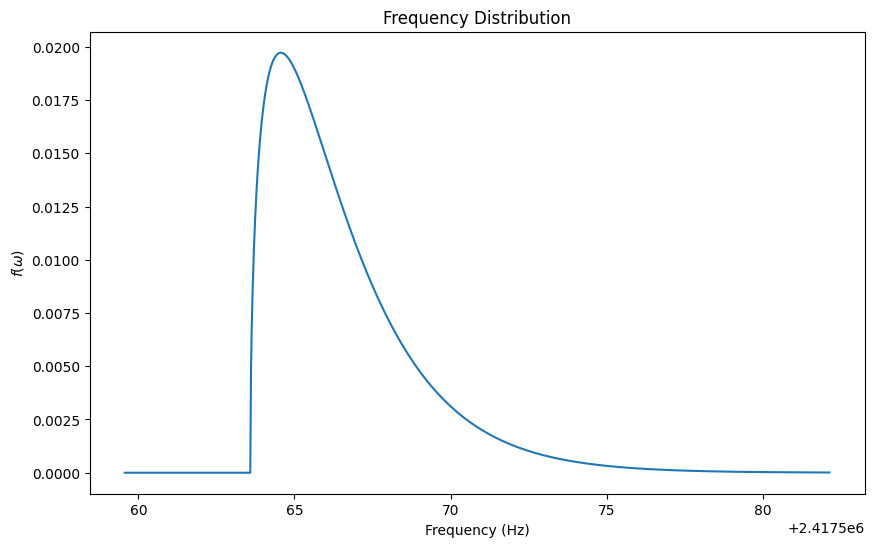

In [6]:
def pdf(f, m):
    """
    Calculate the frequency distribution of the signal.
    
    Parameters:
    f (float): frequency in Hz
    m (float): mass of the DM in eV
    
    Returns:
    float: frequency distribution 1/Hz
    """
    w = f*2*np.pi/eV_to_Hz # eV
    w = np.abs(w)
    w_array = np.asarray(w)
    
    result = np.zeros_like(w_array, dtype=float)
    
    mask = (w_array >= m)
    scale_factor = m * v2/c**2/ 3
    if np.any(mask):
        x = w_array[mask] - m
        result[mask] = np.sqrt(x/np.pi/(scale_factor)**3) * np.exp(-x/scale_factor) # (1/eV)
        result /= eV_to_Hz # (1/Hz)
    
    if np.isscalar(w):
        return float(result)
    else:
        return result
    
m0 = 1e-8 
f_peak, fwhm = peak_freq(m0)
f = np.linspace(f_peak-5, f_peak+3*fwhm, 1000) 
f_dis = pdf(f,m0)

plt.figure(figsize=(10,6))
plt.plot(f, f_dis)
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$f(\omega)$")
plt.title("Frequency Distribution")
plt.show()

## Power Spectral Distribution 

In [7]:
def get_flux(m, g_eff, num_fwhm=3):
    """
    Calculate the Expected flux on earth.
    
    Parameters:
    m (float): mass of the DM in eV
    g_eff (float): effective coupling constant
    
    Returns:
    Array (float): Flux in W/ m2 Hz
    """
    rho_EM = EM_energy_density(m, g_eff) # eV^4
    
    f_peak, fwhm = peak_freq(m)
    f = np.linspace(f_peak-10, f_peak+num_fwhm*fwhm, 1000) 
    w = f*2*np.pi/eV_to_Hz # eV
    f_dis = pdf(f,m) # (1/Hz)
    
    S_sig = 4*np.pi*(w/m)**2*rho_EM*f_dis # eV^4/Hz
    S_sig *= eV2_to_W/eV_1_to_m**2
    
    return (f-f_peak+fwhm/5.2, S_sig)

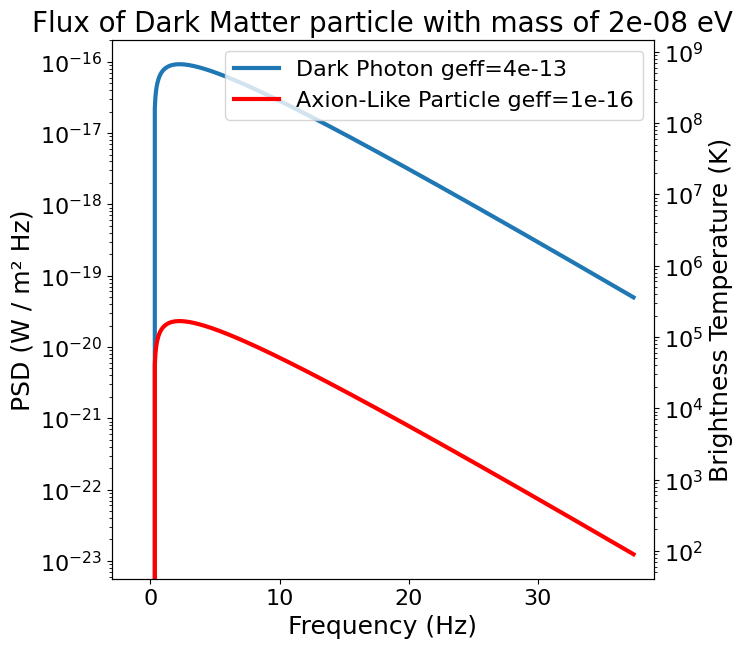

In [8]:
m0 = 2e-8
f_DP, S_DP = get_flux(m0, 4e-13) # <- 2nd param is g_eff for DP
f_ALP, S_ALP = get_flux(m0, alp_g_eff(m0, g_yy=1e-21, B=0.002))

fig, ax1 = plt.subplots(figsize=(7, 7))
lin_w = 3
ax1.plot(f_DP, S_DP, linewidth=lin_w, label="Dark Photon geff=4e-13")
ax1.plot(f_ALP, S_ALP, color='red', linewidth=lin_w, label="Axion-Like Particle geff=1e-16")
ax1.set_xlabel("Frequency (Hz)", fontsize=18)
ax1.set_ylabel("PSD (W / m² Hz)", fontsize=18)
ax1.set_yscale('log')
ax1.set_title(f"Flux of Dark Matter particle with mass of {m0} eV", fontsize=20)
ax1.legend(loc="upper right", fontsize=16)
ax2 = ax1.twinx()
ax2.set_ylabel("Brightness Temperature (K)", fontsize=18)


ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

psd_min, psd_max = ax1.get_ylim()
# Not sure Here -> Ask Mohan
A_eff = 100
T_min = psd_min*A_eff /  k_b
T_max = psd_max*A_eff / k_b

ax1.set_xlim(-3, 39)
ax2.set_ylim(T_min, T_max)
ax2.set_yscale('log')

plt.show()

In [15]:
# g_eff_str = "$g_\\text{eff}$"
g_eff_str = "$\\varepsilon$"
g_yy_str = "$g_{a\\gamma\\gamma}$"
ev2_str = "eV$^2$"
psd_units = "$\\left[ \\frac{\\text{W}}{\\text{m}^2\\text{Hz}} \\right]$"
g_yy_units = "eV$^{-1}$"

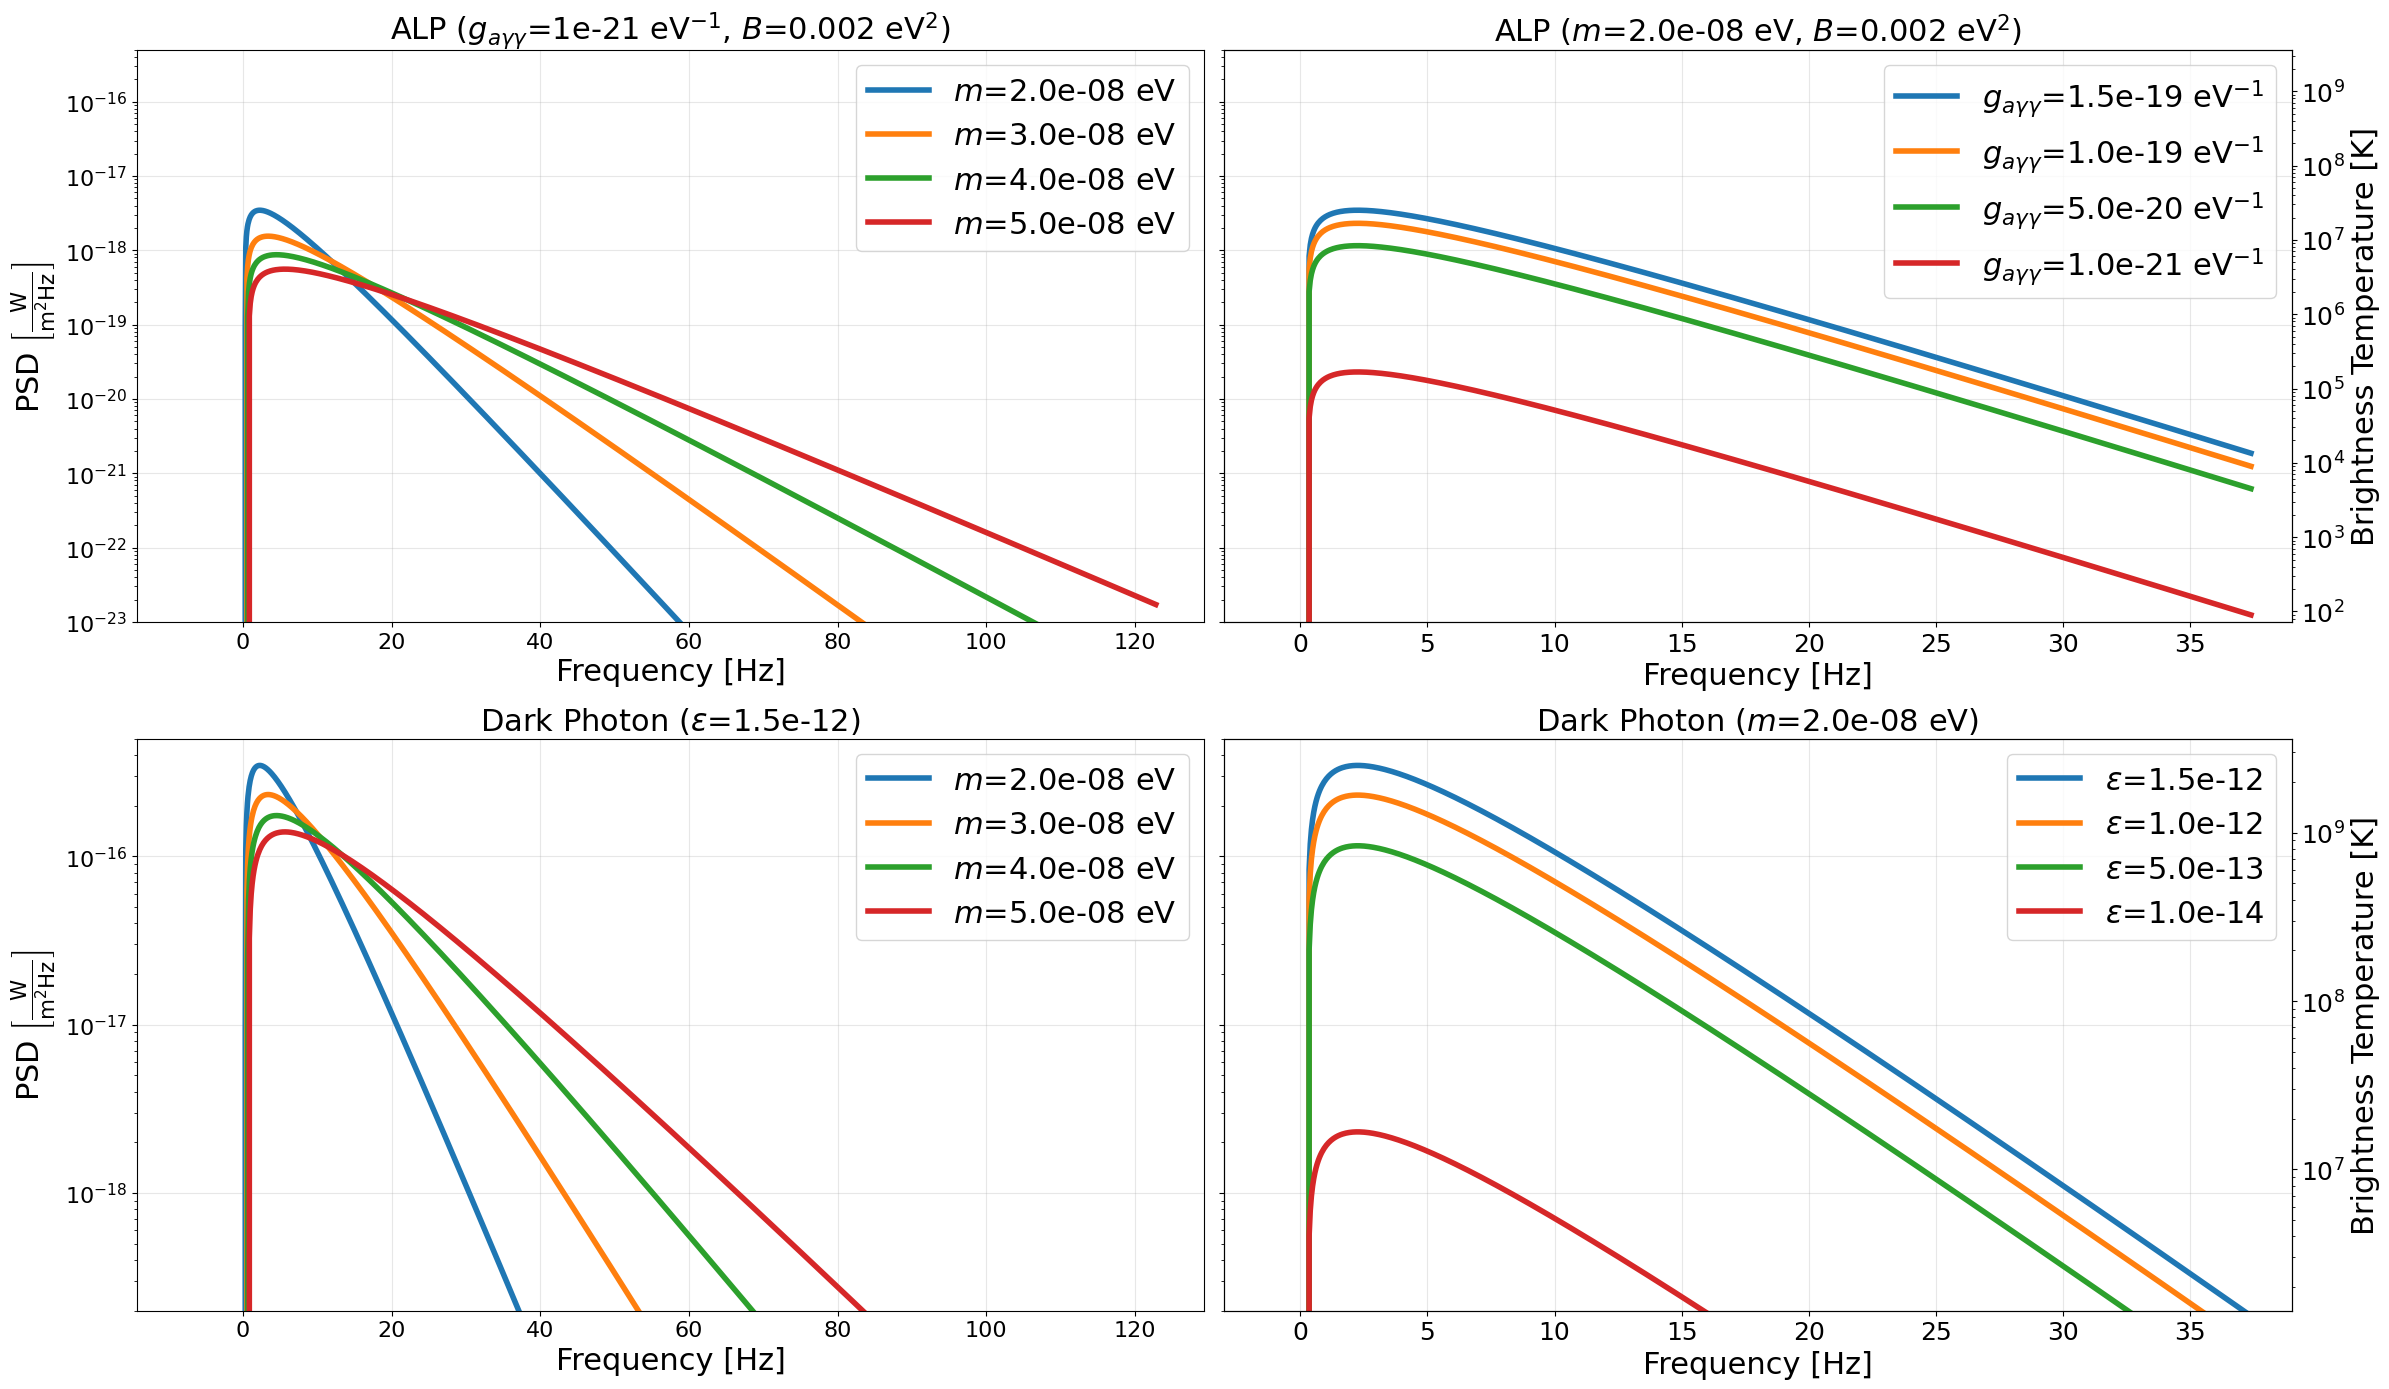

In [30]:
# Define parameter ranges
masses = [2e-8, 3e-8, 4e-8, 5e-8]  # 4 different masses for top plots
# g_effs_DP = [5e-14, 1e-13, 5e-13, 1e-12]  # 4 different g_eff for DP (bottom right)
g_effs_DP = [150e-14, 100e-14, 50e-14, 1e-14]
# g_yys_ALP = [5e-22, 1e-21, 2e-21, 4e-21]  # 4 different g_yy for ALP (bottom left)
g_yys_ALP = [150e-21, 100e-21, 50e-21, 1e-21]
num_fwhm = [5.5, 5, 4.5, 4]

title_font = 22
label_font = 22
tick_font = 18
legend_font = 22

m0 = 2e-8  # Reference mass for bottom plots
B = 0.002  # Magnetic field

fig, axes = plt.subplots(2, 2, figsize=(24, 14), sharey="row")
lin_w = 4

plt.subplots_adjust(wspace=0)

# Top Left: ALP with varying mass
ax = axes[0, 0]
for i, m in enumerate(masses):
    f_ALP, S_ALP = get_flux(m, alp_g_eff(m, g_yy=1.5e-19, B=B), num_fwhm=num_fwhm[i])
    ax.plot(f_ALP, S_ALP, linewidth=lin_w, label=f"$m$={m:.1e} eV")
ax.set_title(f"ALP ({g_yy_str}=1e-21 {g_yy_units}, $B$=0.002 {ev2_str})", fontsize=title_font)
ax.set_ylim(1e-23,5e-16)
# ax.tick_params(axis='both', which='major', labelsize=14)

# Bottom Left: DP with varying mass
ax = axes[1, 0]
for i, m in enumerate(masses):
    f_DP, S_DP = get_flux(m, 1.5e-12, num_fwhm=num_fwhm[i])
    ax.plot(f_DP, S_DP, linewidth=lin_w, label=f"$m$={m:.1e} eV")
ax.set_title(f"Dark Photon ({g_eff_str}=1.5e-12)", fontsize=title_font)
ax.set_ylim(2e-19, 5e-16)

# Top RIght: ALP with varying g_yy (hence g_eff)
ax = axes[0, 1]
for g_yy in g_yys_ALP:
    g_eff = alp_g_eff(m0, g_yy=g_yy, B=B)
    f_ALP, S_ALP = get_flux(m0, g_eff)
    ax.plot(f_ALP, S_ALP, linewidth=lin_w, label=f"{g_yy_str}={g_yy:.1e} {g_yy_units}")
ax.set_title(f"ALP ($m$={m0:.1e} eV, $B$=0.002 {ev2_str})", fontsize=title_font)

# Bottom Right: DP with varying g_eff
ax = axes[1, 1]
for g_eff in g_effs_DP:
    f_DP, S_DP = get_flux(m0, g_eff)
    ax.plot(f_DP, S_DP, linewidth=lin_w, label=f"{g_eff_str}={g_eff:.1e}")
ax.set_title(f"Dark Photon ($m$={m0:.1e} eV)", fontsize=title_font)


for ax in [axes[0,0], axes[1,0], axes[0,1], axes[1,1]]:
    ax.set_xlabel("Frequency [Hz]", fontsize=label_font)
    ax.legend(loc="upper right", fontsize=legend_font)
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)

# --- Left Panels ---
for ax in [axes[0,0], axes[1,0]]:
    ax.set_ylabel(f"PSD {psd_units}", fontsize=label_font)
    ax.set_yscale("log")
    ax.tick_params(axis="both", labelsize=16)
    ax.grid(True, alpha=0.3)

# --- Right panels: add Temperature axis on the RIGHT ONLY ---
right_axes = [axes[0,1], axes[1,1]]
for ax in right_axes:
    ax.set_xlim(-3,39)
    ax.set_yscale("log")
    ax.tick_params(axis="both", labelsize=tick_font)
    ax.grid(True, alpha=0.3)

    # Create one twin axis per row (right-hand axis)
    axT = ax.twinx()
    axT.set_ylabel("Brightness Temperature [K]", fontsize=label_font)
    psd_min, psd_max = ax.get_ylim()
    T_min = psd_min * A_eff / k_b
    T_max = psd_max * A_eff / k_b
    axT.set_ylim(T_min, T_max)
    axT.set_yscale("log")
    axT.tick_params(axis="both", labelsize=tick_font)

plt.tight_layout()
plt.show()

## Signal to Noise 